In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import seaborn as sns
from copy import deepcopy
from matplotlib.ticker import FormatStrFormatter
plt.rcParams.update({"font.size": 20,
                     "text.usetex": True,
                     "font.family": "Times New Roman"}) # fontsize for figures

In [2]:
data_path = "./fig/nCase441_k1_MRN_ld5_subsize50_upfreq2000_tol5/"
params = pickle.load(open(data_path + "burger_2022_04_15_20_30_42_params.pkl",'rb'))
print(params.keys())

dict_keys(['seed', 'config', 'num_sindy', 'param', 'train_idx', 'input_dim', 'latent_dim', 'model_order', 'poly_order', 'include_sine', 'include_cosine', 'include_costant', 'library_dim', 'sequential_thresholding', 'coefficient_threshold', 'threshold_frequency', 'coefficient_mask', 'coefficient_initialization', 'loss_weight_decoder', 'loss_weight_sindy_x', 'loss_weight_sindy_z', 'loss_weight_sindy_regularization', 'diff', 'activation', 'widths', 'epoch_size', 'batch_size', 'learning_rate', 'data_path', 'fig_path', 'print_progress', 'print_frequency', 'save_frequency', 'max_epochs', 'refinement_epochs', 'update_epoch', 'tol', 'tol2', 'sindy_max', 'convex_knn', 'test_data', 'test_param', 'num_test', 'coeff_exist', 'retrain', 'err_type', 'subsize', 'subsize_max', 'adaptive', 'pde', 'scaled', 'save_name', 'training_losses', 'epoch_count', 'model_params', 'testing_losses', 'err_array', 'max_err_idx_param', 'sindy_idx'])


min train loss: 0.00001553
min test loss: 0.00059627


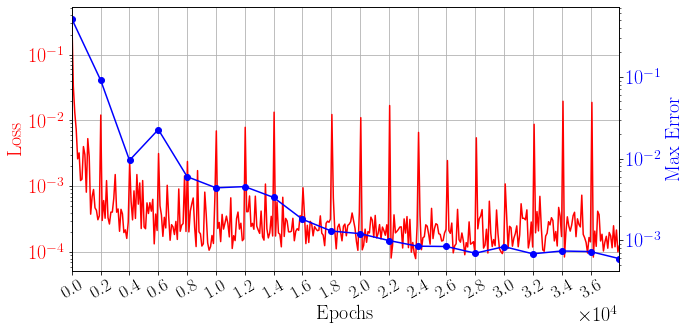

In [3]:
# history of validation loss
lamb1 = params['loss_weight_sindy_x']
lamb2 = params['loss_weight_sindy_z']
lamb3 = params['loss_weight_sindy_regularization']


# history of validation loss
train_loss = np.array(params['training_losses']).squeeze()
test_loss = np.array(params['testing_losses']).squeeze()
print(f'min train loss: {train_loss.min():.8f}')
print(f'min test loss: {test_loss.min():.8f}')

fig, ax1 = plt.subplots(figsize=(10,5))
xt = np.linspace(1,params['epoch_count'],train_loss.shape[0])
ax1.plot(xt, train_loss[:,0], 'r', label='Train')
ax1.set_yscale('log')
# ax1.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='r')
ax1.set_xlim(0, params['epoch_count'])
ax1.set_xticks(np.arange(0,params['epoch_count'],params['update_epoch']))
plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
ax1.tick_params(axis='x', labelsize=18, labelrotation=30)
ax1.tick_params(axis='y', labelcolor='r')
ax1.grid()

ax2 = ax1.twinx()
xt = np.linspace(1,params['epoch_count'],test_loss.shape[0])
ax2.plot(xt, test_loss, 'b-o', label='Val')
ax2.set_yscale('log')
ax2.set_ylabel('Max Error', color='b')
ax2.tick_params(axis='both')
ax2.tick_params(axis='y', labelcolor='b')

plt.tight_layout()
plt.savefig(data_path + f"loss.png")

In [4]:
# heat map of max relative errors
sns.set(font_scale=1.3)
def max_err_heatmap(max_err, sindy_idx, idx_list, idx_param, dtype='int', scale=1, mask=None):
    if dtype == 'int':
        max_err = max_err.astype(int)
    rect = []
    rect.append(patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='k', facecolor='none'))
    rect.append(patches.Rectangle((amp_test.size-1, 0), 1, 1, linewidth=2, edgecolor='k', facecolor='none'))
    rect.append(patches.Rectangle((amp_test.size-1, width_test.size-1), 1, 1, linewidth=2, edgecolor='k', facecolor='none'))
    rect.append(patches.Rectangle((0, width_test.size-1), 1, 1, linewidth=2, edgecolor='k', facecolor='none'))
    for i in range(len(idx_param)):
        print(f"idx: {idx_param[i][0]}, param: {idx_param[i][1]}")
        idd = idx_param[i][0]
        rect.append(patches.Rectangle((idx_list[idd,0], idx_list[idd,1]), 1, 1, 
                                      linewidth=2, edgecolor='k', facecolor='none'))
    idx_max_err = np.argmax(max_err)
    rect.append(patches.Rectangle((idx_list[idx_max_err,0], idx_list[idx_max_err,1]), 1, 1, 
                                      linewidth=3, edgecolor='lime', facecolor='none'))
    rect2 = deepcopy(rect)
    
    if max_err.size < 100:
        fig = plt.figure(figsize=(10,5))
    else:
        fig = plt.figure(figsize=(18,9))
    
    # local SINDy indices
    ax = fig.add_subplot(121)
    sindy_idx = sindy_idx.astype(int)
    sns.heatmap(sindy_idx, ax=ax, square=True, xticklabels=width_test, yticklabels=amp_test, 
                annot=True, fmt='d', annot_kws={'size':14}, 
                cbar=False, cmap='Spectral', robust=True, vmin=1, vmax=15, mask=mask)
    for i in rect:
        ax.add_patch(i)
        
    # format text labels
    fmt = '{:0.2f}'
    xticklabels = []
    for item in ax.get_xticklabels():
        item.set_text(fmt.format(float(item.get_text())))
        xticklabels += [item]
    yticklabels = []
    for item in ax.get_yticklabels():
        item.set_text(fmt.format(float(item.get_text())))
        yticklabels += [item]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_xlabel('Width', fontsize=16)
    ax.set_ylabel('Amplitude', fontsize=16)
    ax.set_title('Index of Selected Local SINDy', fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30) 

    # heatmap of max relative errors
    ax = fig.add_subplot(122)
    cbar_ax = fig.add_axes([0.99, 0.19, 0.018, 0.7])
    sns.heatmap(max_err*scale, ax=ax, square=True, xticklabels=width_test, yticklabels=amp_test, 
                annot=True, annot_kws={'size':14}, fmt='.1f', 
                cbar_ax=cbar_ax, cbar=True, cmap='vlag', robust=True, vmin=0, vmax=max_err.max()*scale, mask=mask)
    for i in rect2:
        ax.add_patch(i)
        
    # format text labels
    fmt = '{:0.2f}'
    xticklabels = []
    for item in ax.get_xticklabels():
        item.set_text(fmt.format(float(item.get_text())))
        xticklabels += [item]
    yticklabels = []
    for item in ax.get_yticklabels():
        item.set_text(fmt.format(float(item.get_text())))
        yticklabels += [item]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_xlabel('Width', fontsize=16)
    ax.set_ylabel('Amplitude', fontsize=16)
#     ax.set_title(f'Max. Error (x{scale})', fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30) 
    
    plt.tight_layout()
    plt.savefig(data_path + f'heatmap_{len(idx_param)}.png', bbox_inches='tight')
    plt.show()

/g/g92/he10/.conda/envs/tfvenv/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


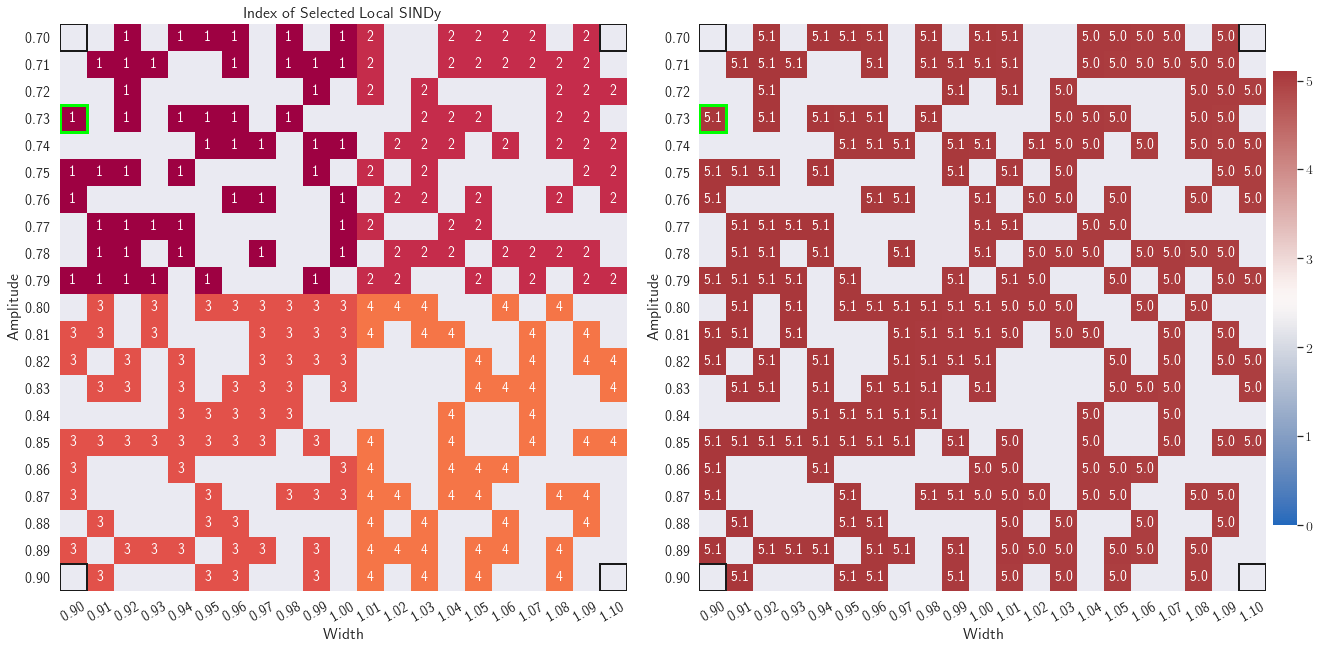

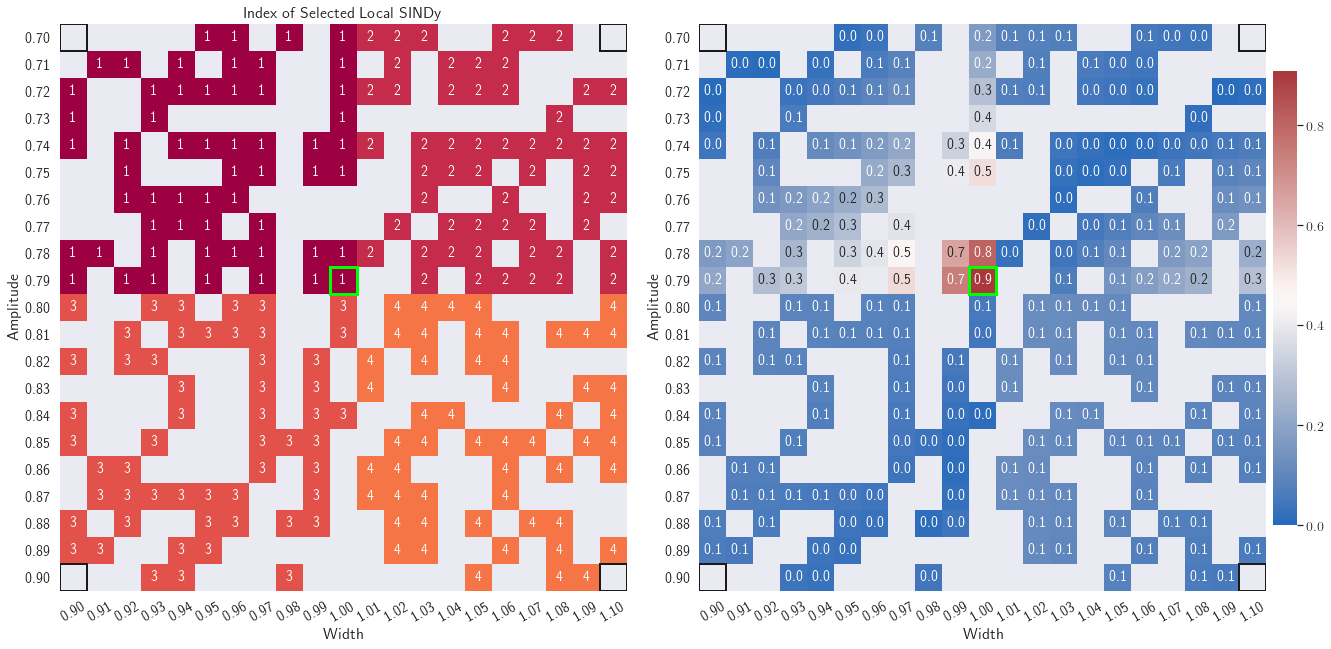

idx: 199, param: [0.79 1.  ]


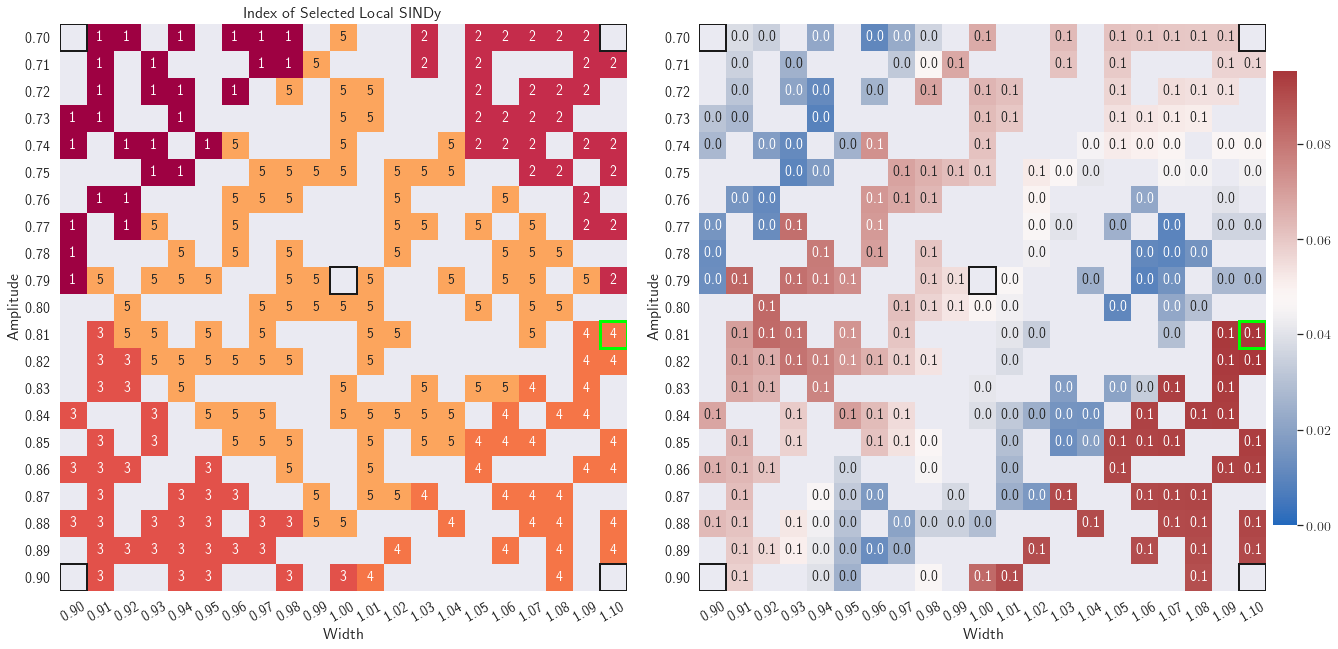

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]


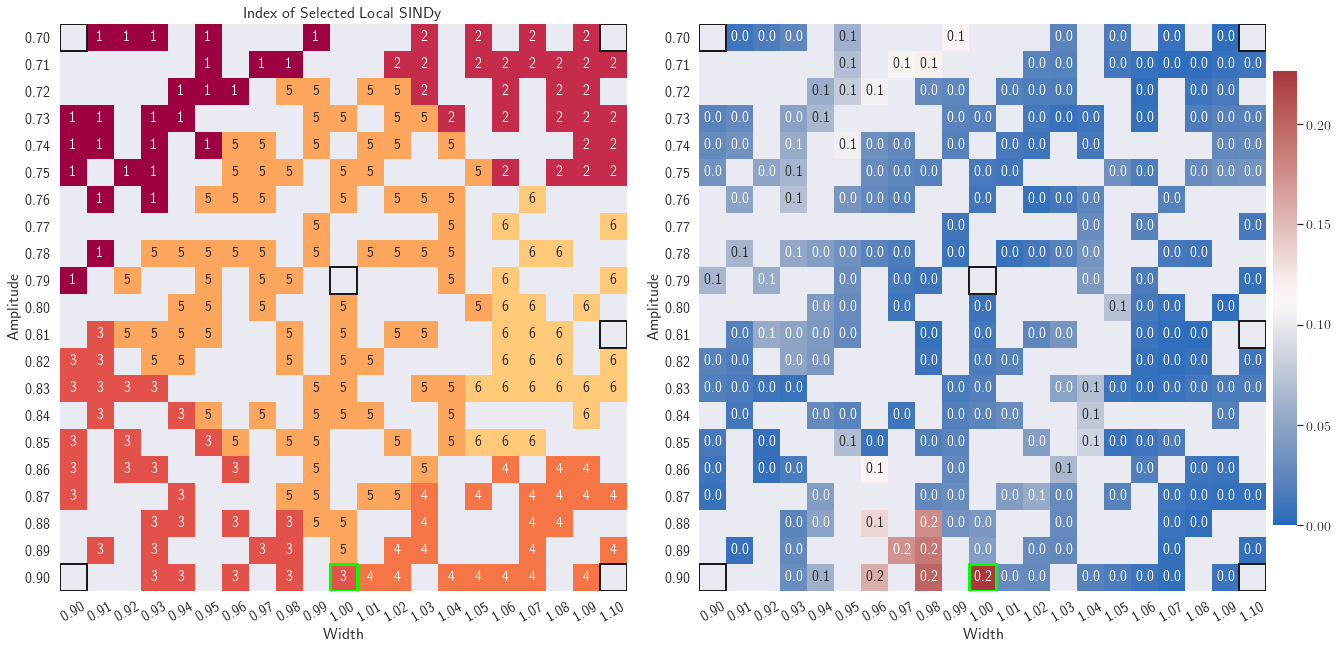

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]


/g/g92/he10/.conda/envs/tfvenv/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


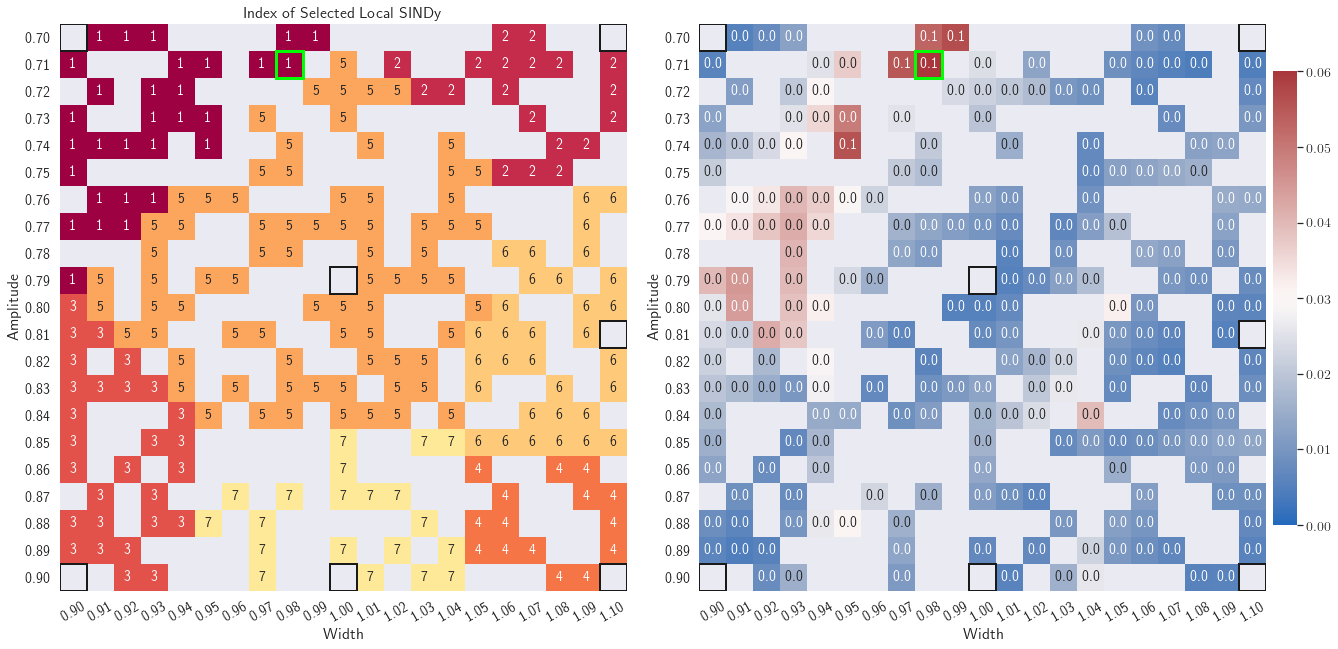

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]


/g/g92/he10/.conda/envs/tfvenv/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


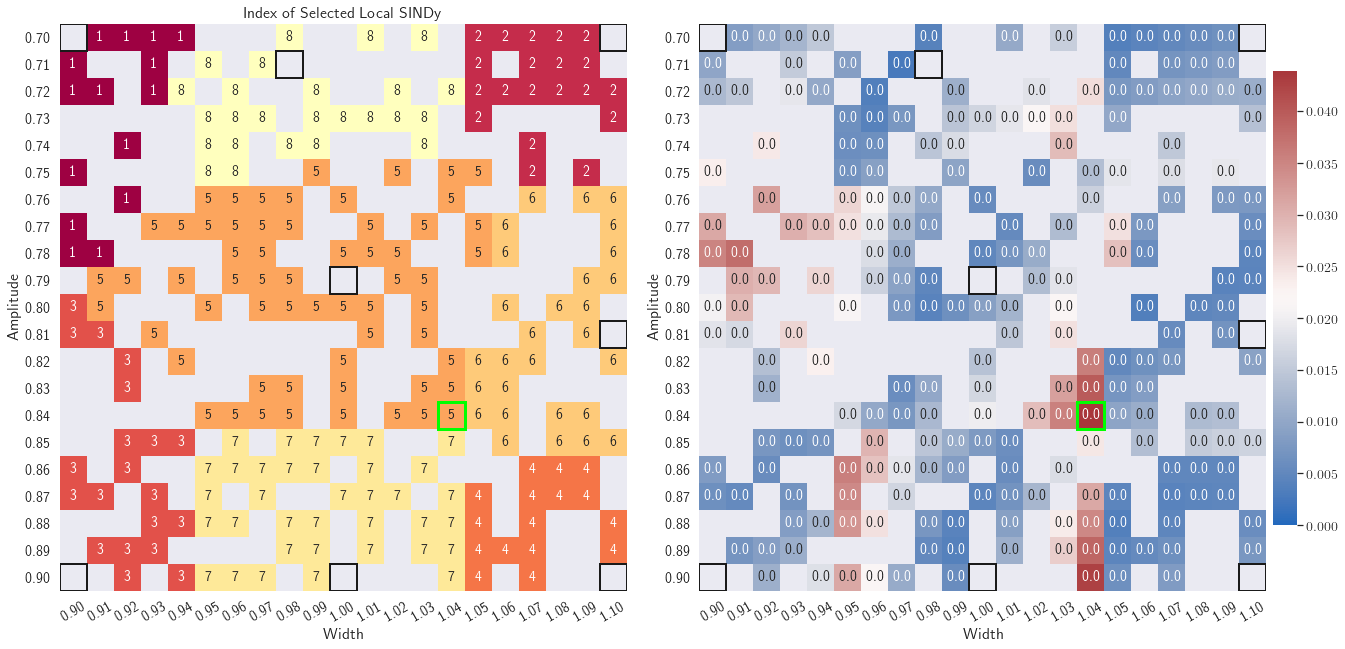

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]


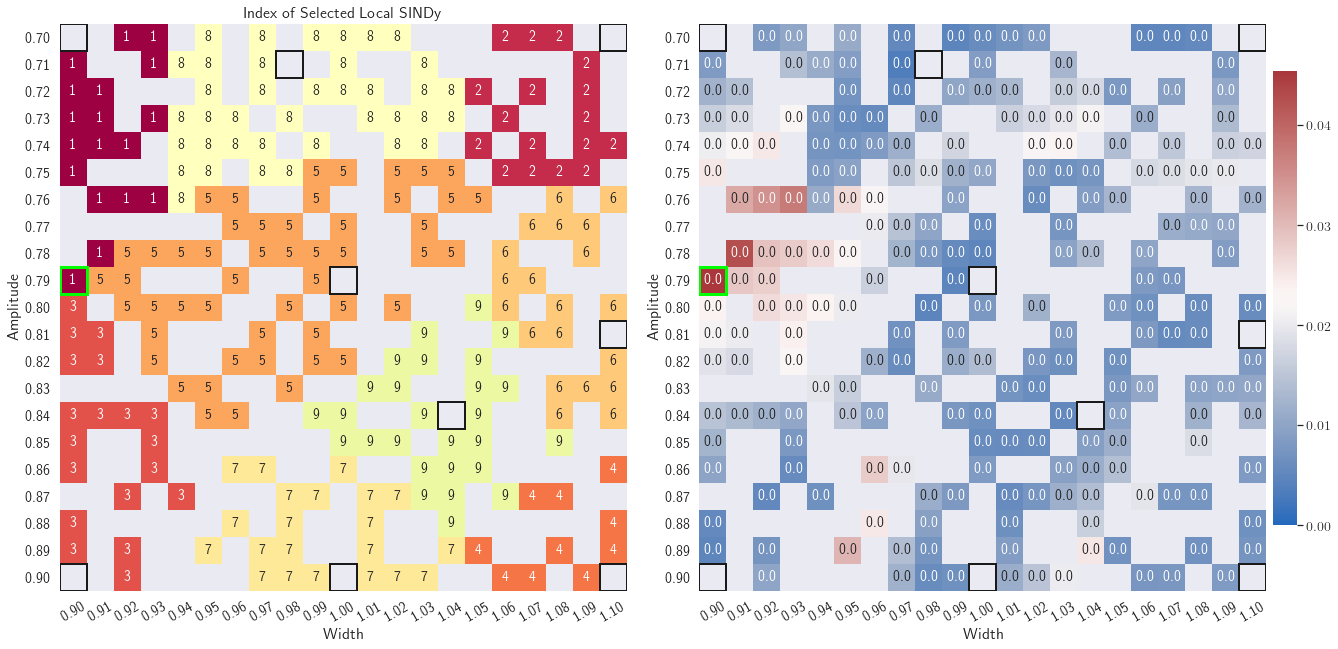

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]


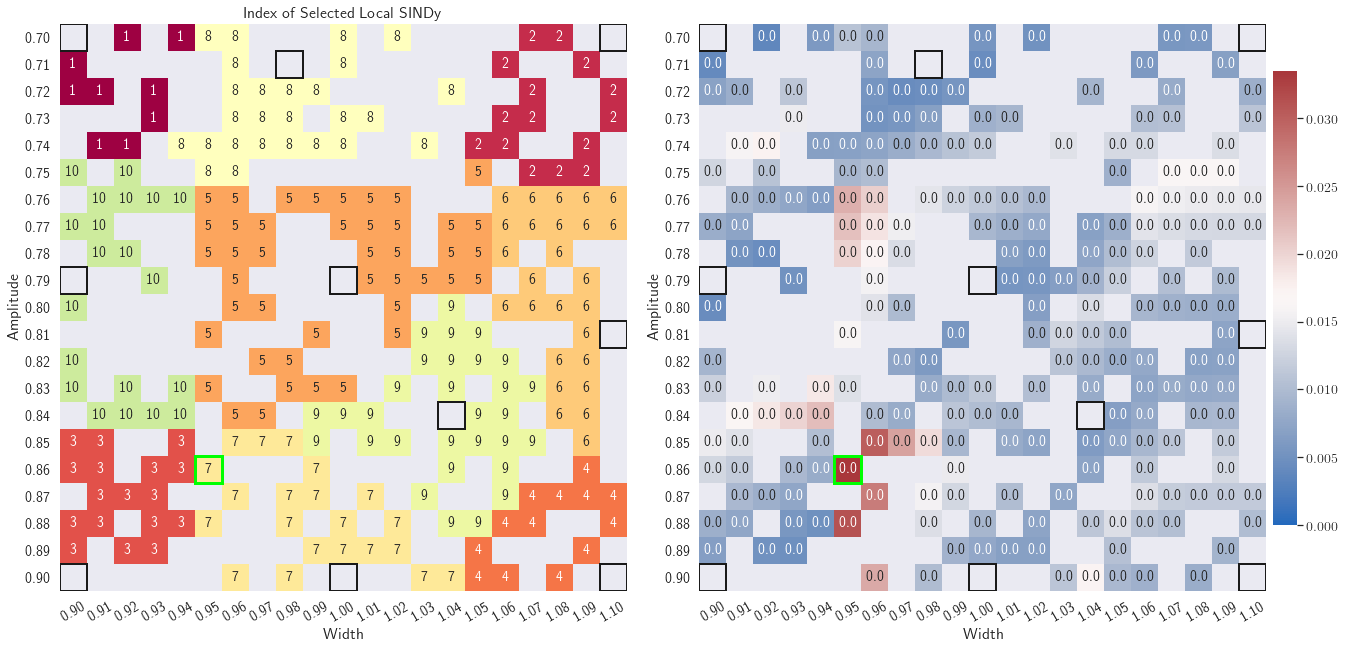

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]


/g/g92/he10/.conda/envs/tfvenv/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


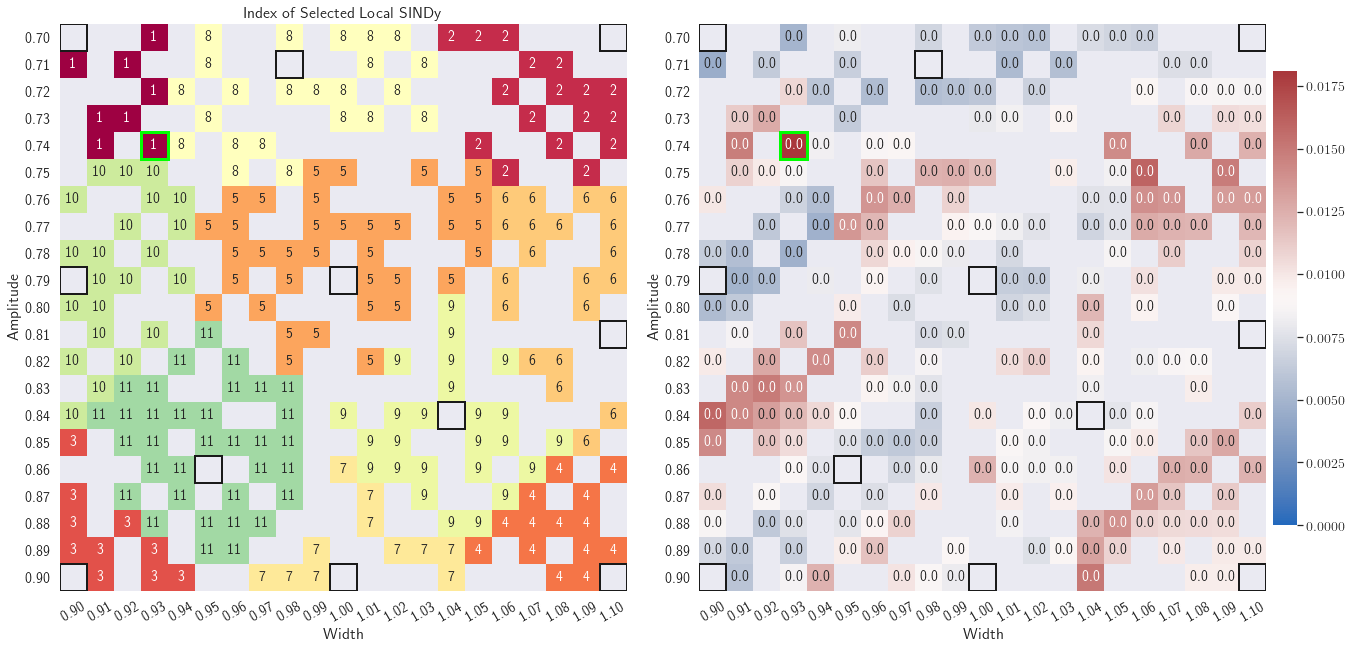

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]


/g/g92/he10/.conda/envs/tfvenv/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


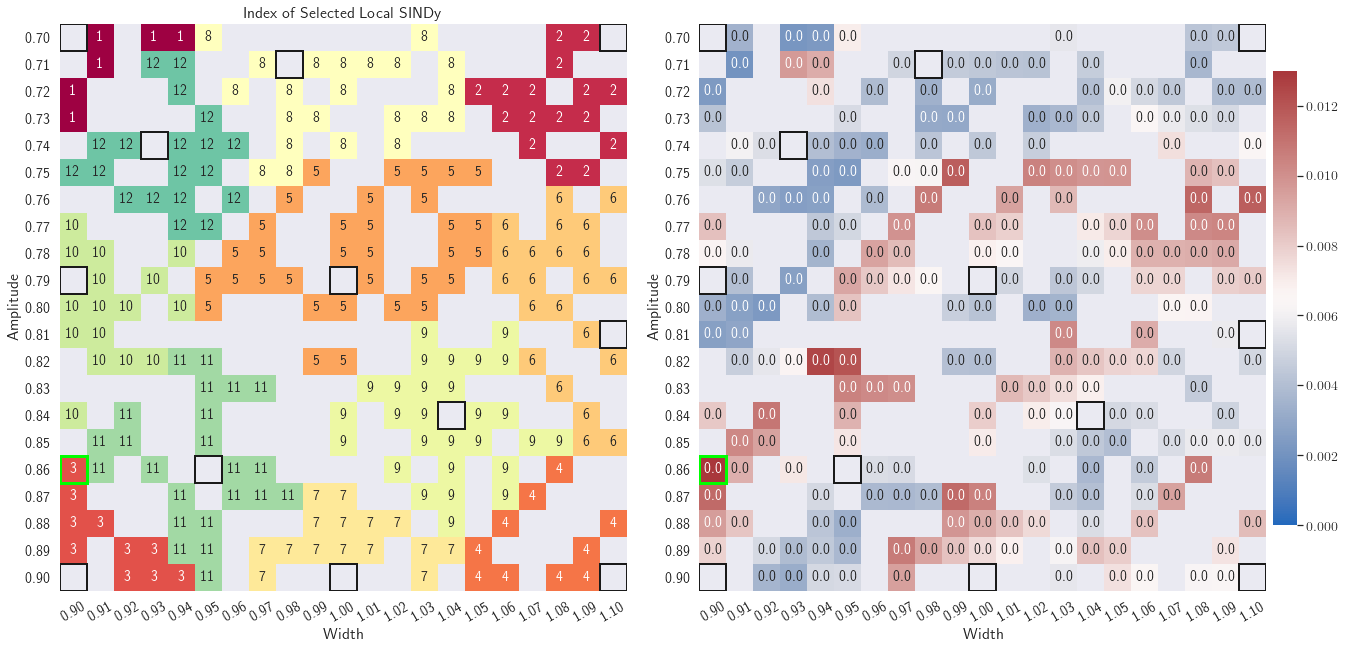

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]
idx: 336, param: [0.86 0.9 ]


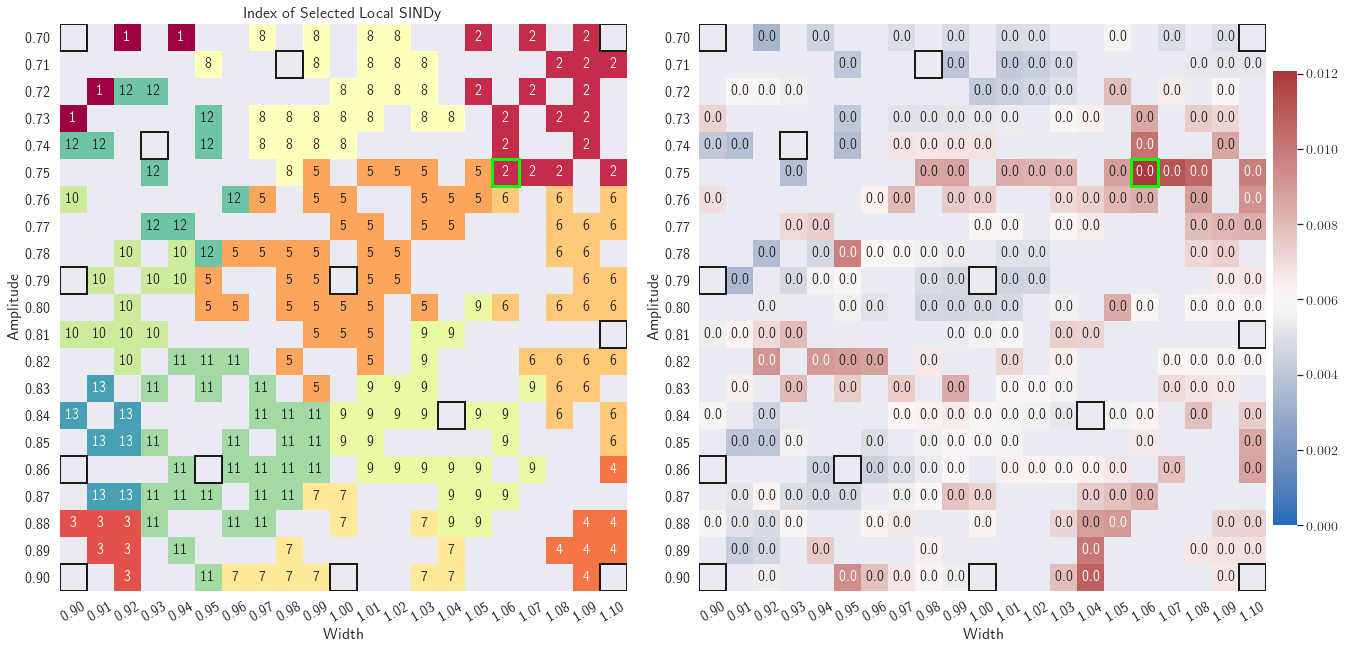

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]
idx: 336, param: [0.86 0.9 ]
idx: 121, param: [0.75 1.06]


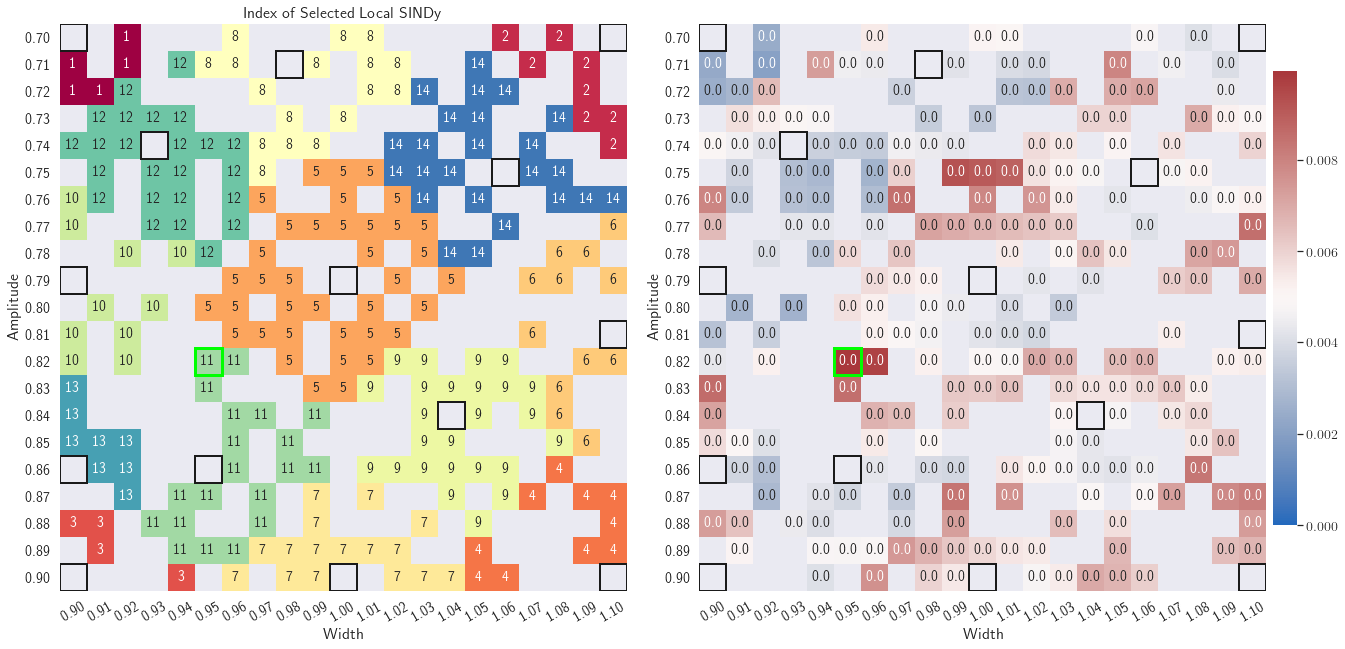

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]
idx: 336, param: [0.86 0.9 ]
idx: 121, param: [0.75 1.06]
idx: 257, param: [0.82 0.95]


/g/g92/he10/.conda/envs/tfvenv/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


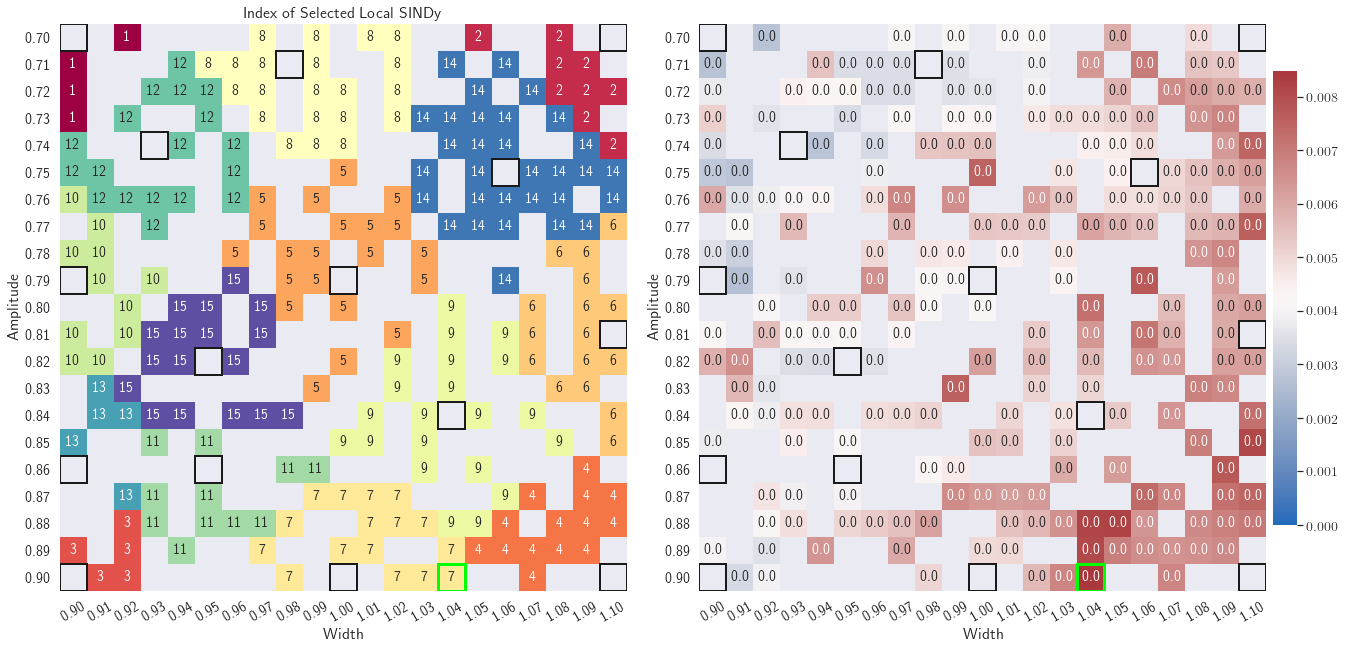

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]
idx: 336, param: [0.86 0.9 ]
idx: 121, param: [0.75 1.06]
idx: 257, param: [0.82 0.95]
idx: 434, param: [0.9  1.04]


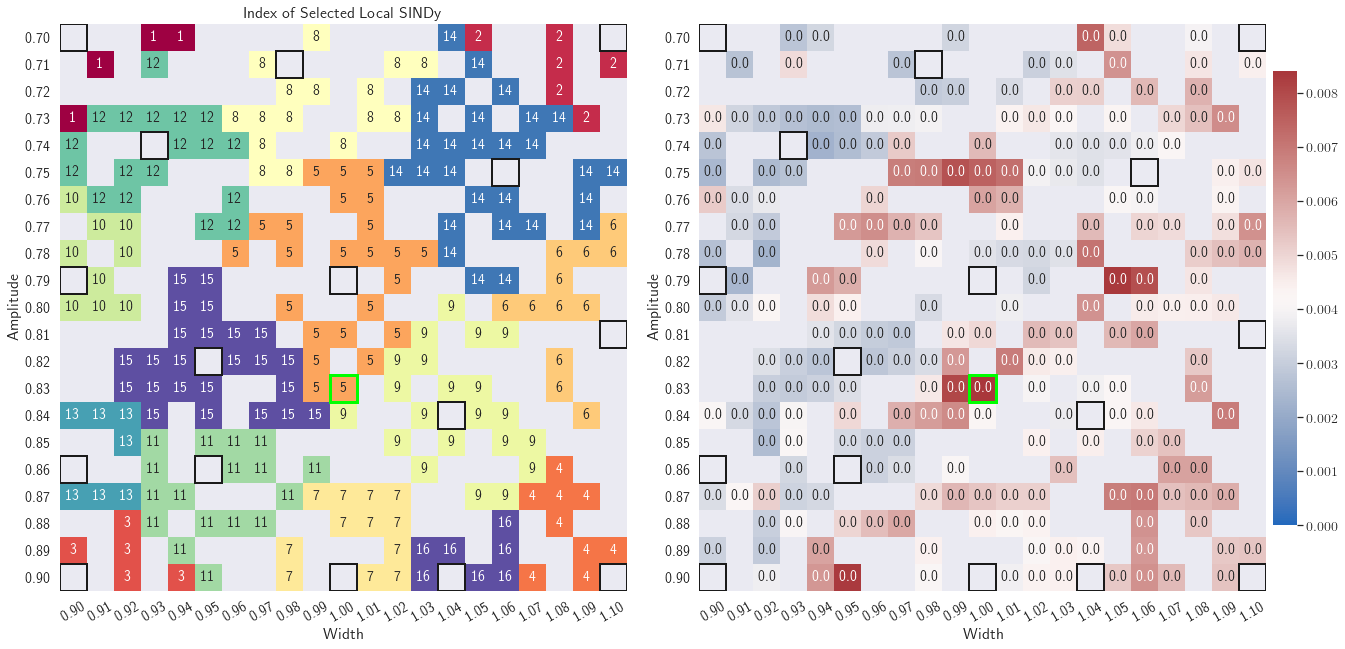

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]
idx: 336, param: [0.86 0.9 ]
idx: 121, param: [0.75 1.06]
idx: 257, param: [0.82 0.95]
idx: 434, param: [0.9  1.04]
idx: 283, param: [0.83 1.  ]


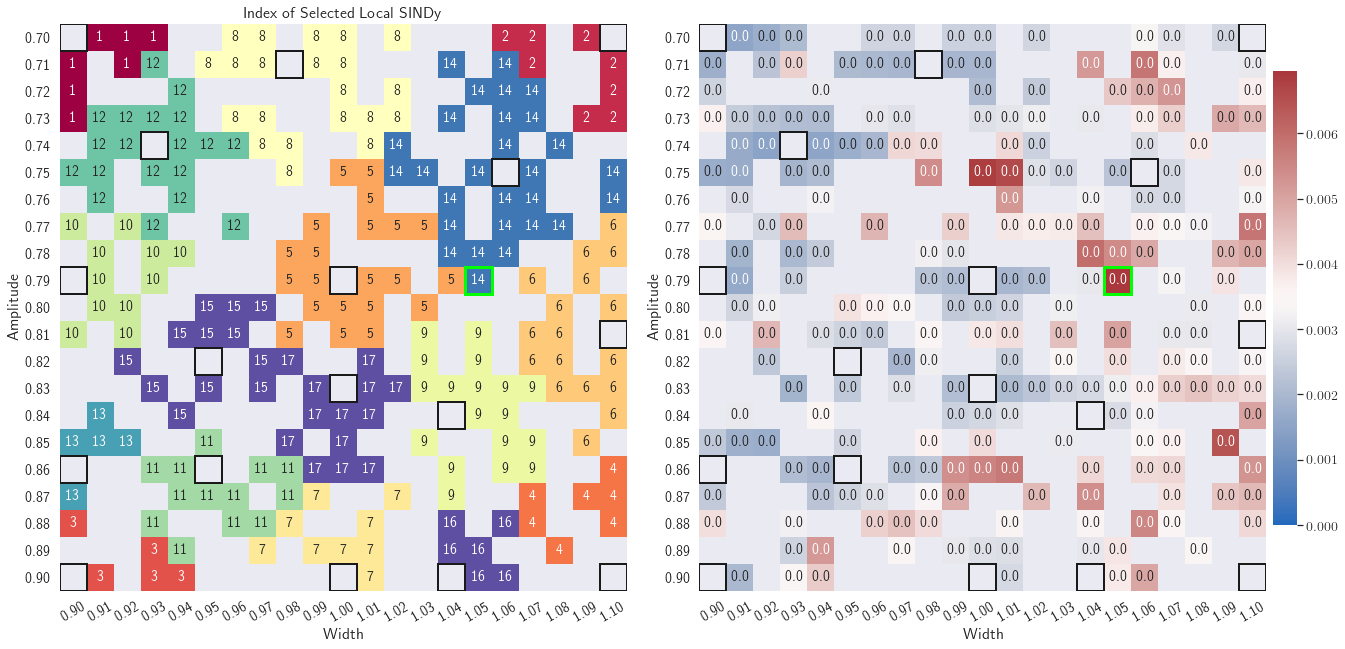

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]
idx: 336, param: [0.86 0.9 ]
idx: 121, param: [0.75 1.06]
idx: 257, param: [0.82 0.95]
idx: 434, param: [0.9  1.04]
idx: 283, param: [0.83 1.  ]
idx: 204, param: [0.79 1.05]


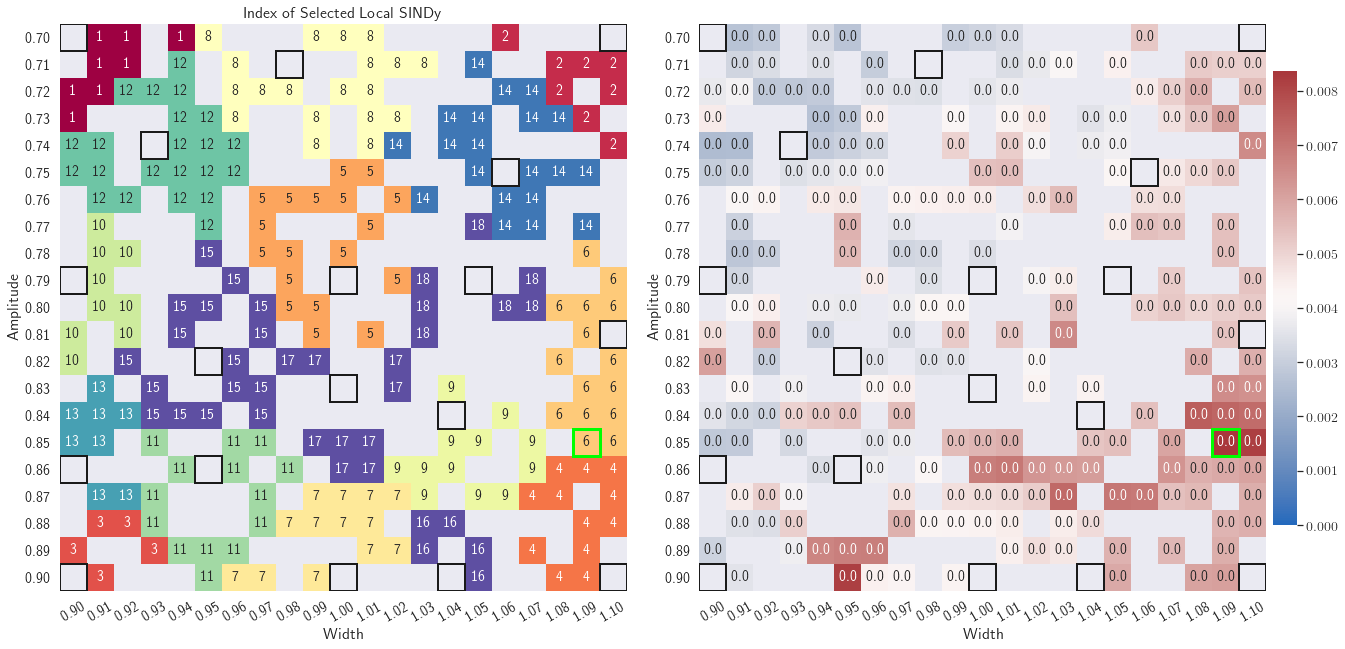

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]
idx: 336, param: [0.86 0.9 ]
idx: 121, param: [0.75 1.06]
idx: 257, param: [0.82 0.95]
idx: 434, param: [0.9  1.04]
idx: 283, param: [0.83 1.  ]
idx: 204, param: [0.79 1.05]
idx: 334, param: [0.85 1.09]


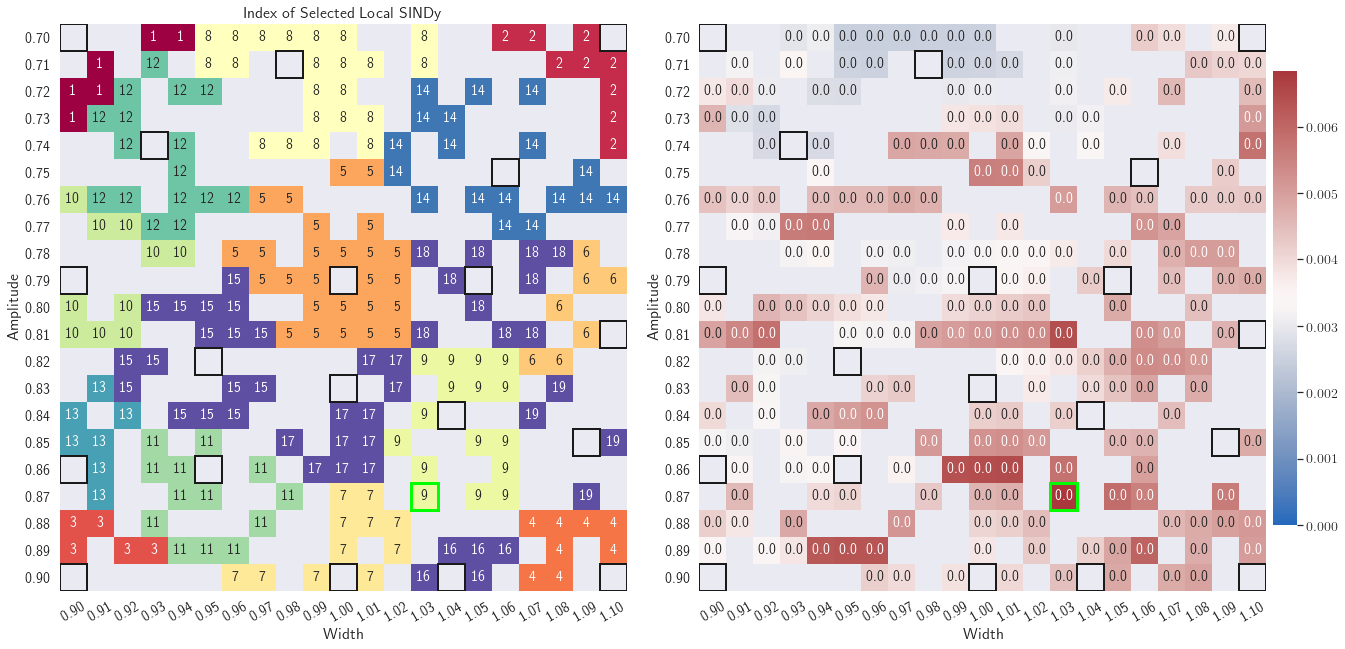

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]
idx: 336, param: [0.86 0.9 ]
idx: 121, param: [0.75 1.06]
idx: 257, param: [0.82 0.95]
idx: 434, param: [0.9  1.04]
idx: 283, param: [0.83 1.  ]
idx: 204, param: [0.79 1.05]
idx: 334, param: [0.85 1.09]
idx: 370, param: [0.87 1.03]


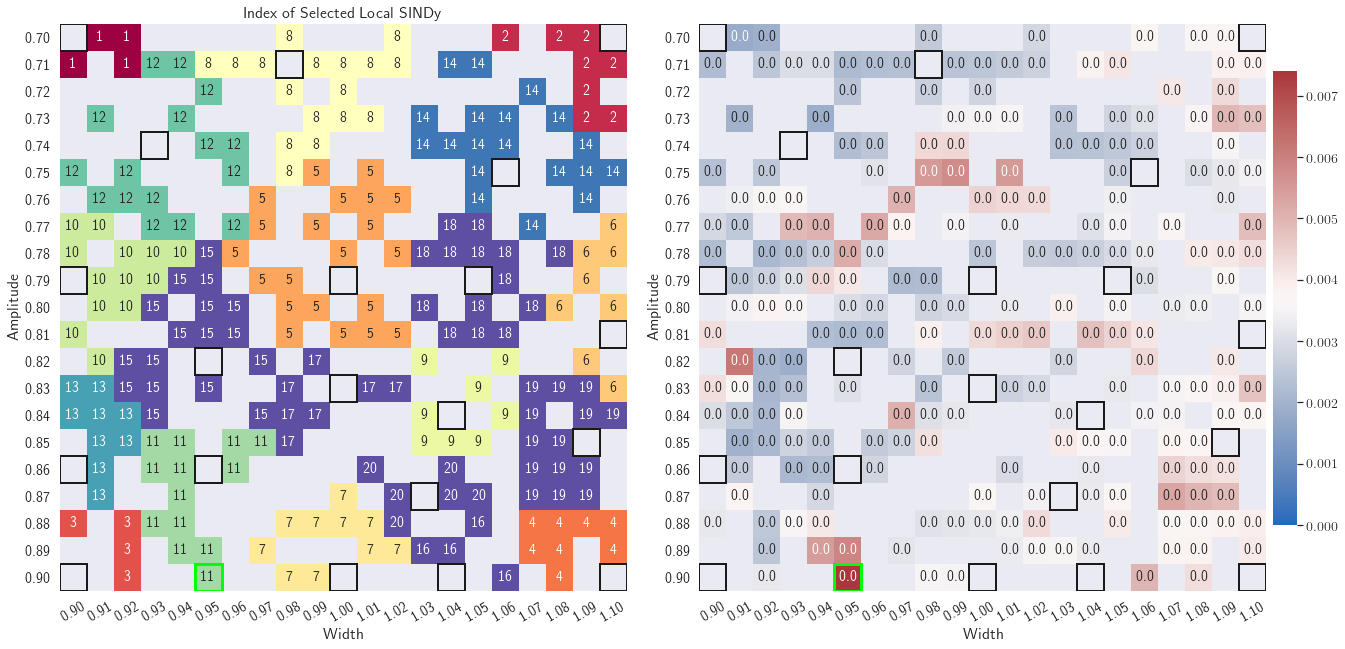

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]
idx: 336, param: [0.86 0.9 ]
idx: 121, param: [0.75 1.06]
idx: 257, param: [0.82 0.95]
idx: 434, param: [0.9  1.04]
idx: 283, param: [0.83 1.  ]
idx: 204, param: [0.79 1.05]
idx: 334, param: [0.85 1.09]
idx: 370, param: [0.87 1.03]
idx: 425, param: [0.9  0.95]


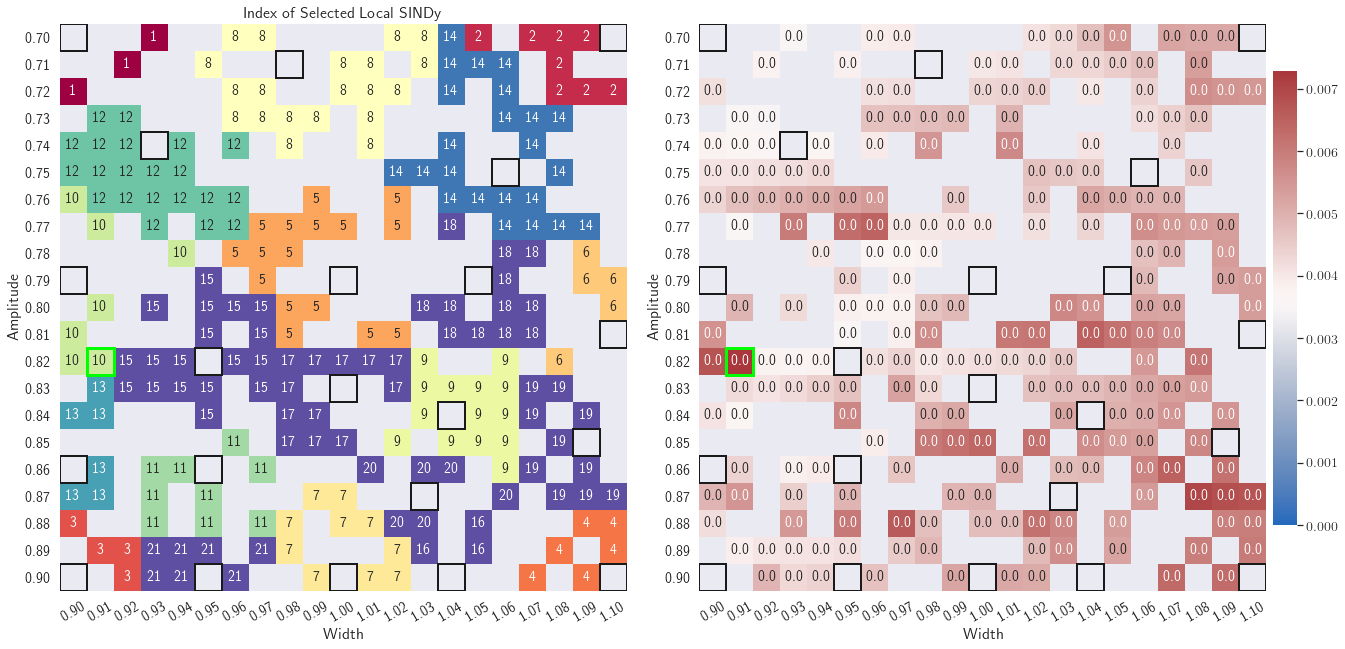

idx: 199, param: [0.79 1.  ]
idx: 251, param: [0.81 1.1 ]
idx: 430, param: [0.9 1. ]
idx: 29, param: [0.71 0.98]
idx: 308, param: [0.84 1.04]
idx: 189, param: [0.79 0.9 ]
idx: 341, param: [0.86 0.95]
idx: 87, param: [0.74 0.93]
idx: 336, param: [0.86 0.9 ]
idx: 121, param: [0.75 1.06]
idx: 257, param: [0.82 0.95]
idx: 434, param: [0.9  1.04]
idx: 283, param: [0.83 1.  ]
idx: 204, param: [0.79 1.05]
idx: 334, param: [0.85 1.09]
idx: 370, param: [0.87 1.03]
idx: 425, param: [0.9  0.95]
idx: 253, param: [0.82 0.91]


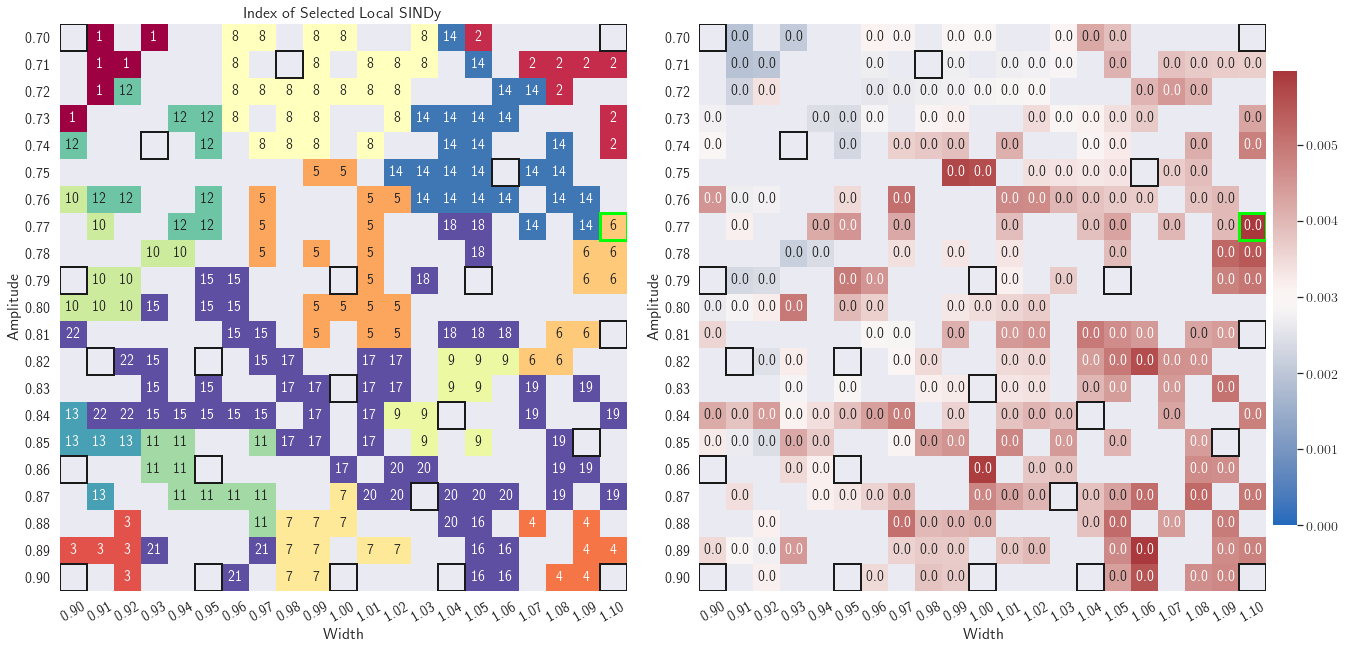

In [5]:
amp_test = params['test_param'][:,0]
width_test = params['test_param'][:,1]
a_grid, w_grid = np.meshgrid(np.arange(amp_test.size), np.arange(width_test.size))
idx_list = np.hstack([a_grid.flatten().reshape(-1,1), w_grid.flatten().reshape(-1,1)])
scale = 10
for i in range(len(params['err_array'])):
    idx_param = params['max_err_idx_param'][i]
    mask = params['sindy_idx'][i]==-1
    max_err_heatmap(params['err_array'][i], params['sindy_idx'][i], idx_list, 
                    idx_param, dtype='float', scale=scale, mask=mask)